In [1]:
import pandas as pd
data1=pd.read_csv('D:\GREAT LEARNING(EXCELR)\ASSIGNMENTS\data_eda.csv')
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
data1

Medicine                     Condition  \
0          Mirtazapine                    Depression   
1           Mesalamine  Crohn's Disease, Maintenance   
2              Bactrim       Urinary Tract Infection   
3             Contrave                   Weight Loss   
4      Cyclafem 1 / 35                 Birth Control   
...                ...                           ...   
55324     Pantoprazole                          GERD   
55325     Pantoprazole                          GERD   
55326     Pantoprazole                          GERD   
55327     Pantoprazole                          GERD   
55328     Pantoprazole                          GERD   

                                                 Reviews  Ratings       Date  \
0      "I&#039;ve tried a few antidepressants over th...     10.0  28-Feb-12   
1      "My son has Crohn&#039;s disease and has done ...      8.0  17-May-09   
2                          "Quick reduction of symptoms"      9.0  29-Sep-17   
3      "Contrave combines drugs that were used for al...      9.0  05-Mar-17   
4      "I have been on this birth control for one cyc...      9.0  22-Oct-15   
...                                                  ...      ...        ...   
55324  I've been prescribed 40mg of protonix twice a ...      NaN  25-Mar-20   
55325  pantoprazole gave me no side effects at all. W...      NaN  21-Mar-20   
55326  I have taken it for mild reflux (which was dis...      2.0  19-Feb-20   
55327  I was prescribed 40 mg of Pantoprazole for GER...      NaN  18-Feb-20   
55328  Took pantoprazole 20mg for 10 days for GERD.  ...      3.0  16-Feb-20   

       Useful Count  
0                22  
1                17  
2                 3  
3                35  
4                 4  
...             ...  
55324            25  
55325            20  
55326            15  
55327            47  
55328            36  

[55329 rows x 6 columns]

In [3]:
data1.isna().sum()

Medicine          0
Condition       295
Reviews           0
Ratings         103
Date              0
Useful Count      0
dtype: int64

In [4]:
counts=data1['Medicine'].value_counts()

In [5]:
##Removing medicines having reviews less than 10
data1=data1.loc[data1['Medicine'].isin(counts.index[counts > 10])]

In [6]:
data1

Medicine                     Condition  \
0       Mirtazapine                    Depression   
1        Mesalamine  Crohn's Disease, Maintenance   
2           Bactrim       Urinary Tract Infection   
3          Contrave                   Weight Loss   
6            Copper                 Birth Control   
...             ...                           ...   
55324  Pantoprazole                          GERD   
55325  Pantoprazole                          GERD   
55326  Pantoprazole                          GERD   
55327  Pantoprazole                          GERD   
55328  Pantoprazole                          GERD   

                                                 Reviews  Ratings       Date  \
0      "I&#039;ve tried a few antidepressants over th...     10.0  28-Feb-12   
1      "My son has Crohn&#039;s disease and has done ...      8.0  17-May-09   
2                          "Quick reduction of symptoms"      9.0  29-Sep-17   
3      "Contrave combines drugs that were used for al...      9.0  05-Mar-17   
6      "I&#039;ve had the copper coil for about 3 mon...      6.0  06-Jun-16   
...                                                  ...      ...        ...   
55324  I've been prescribed 40mg of protonix twice a ...      NaN  25-Mar-20   
55325  pantoprazole gave me no side effects at all. W...      NaN  21-Mar-20   
55326  I have taken it for mild reflux (which was dis...      2.0  19-Feb-20   
55327  I was prescribed 40 mg of Pantoprazole for GER...      NaN  18-Feb-20   
55328  Took pantoprazole 20mg for 10 days for GERD.  ...      3.0  16-Feb-20   

       Useful Count  
0                22  
1                17  
2                 3  
3                35  
6                 1  
...             ...  
55324            25  
55325            20  
55326            15  
55327            47  
55328            36  

[49889 rows x 6 columns]

In [7]:
pd.to_numeric(data1['Ratings'])

0        10.0
1         8.0
2         9.0
3         9.0
6         6.0
         ... 
55324     NaN
55325     NaN
55326     2.0
55327     NaN
55328     3.0
Name: Ratings, Length: 49889, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


In [9]:
from textblob import TextBlob

In [10]:
data1['Medicine'].unique().tolist()

['Mirtazapine',
 'Mesalamine',
 'Bactrim',
 'Contrave',
 'Copper',
 'Amitriptyline',
 'Methadone',
 'Levora',
 'Paroxetine',
 'Miconazole',
 'Belviq',
 'Seroquel',
 'Ambien',
 'Nuvigil',
 'Chantix',
 'Microgestin Fe 1 / 20',
 'Klonopin',
 'Ciprofloxacin',
 'Trazodone',
 'Aripiprazole',
 'Cyclosporine',
 'Oxybutynin',
 'Lurasidone',
 'Clonazepam',
 'Ciclopirox',
 'Sodium oxybate',
 'Lamotrigine',
 'Blisovi Fe 1 / 20',
 'Ivermectin',
 'Suprep Bowel Prep Kit',
 'Movantik',
 'Lorcaserin',
 'Duloxetine',
 'NuvaRing',
 'Escitalopram',
 'Campral',
 'Gabapentin',
 'Levonorgestrel',
 'Aubra',
 'Plan B One-Step',
 'Ethinyl estradiol / etonogestrel',
 'Microgestin Fe 1.5 / 30',
 'Wellbutrin',
 'Benzoyl peroxide / clindamycin',
 'Etonogestrel',
 'Nitrofurantoin',
 'Ortho Tri-Cyclen Lo',
 'Tamsulosin',
 'Tofacitinib',
 'Cryselle',
 'Amphetamine / dextroamphetamine',
 'Clindamycin',
 'Pramipexole',
 'Skyla',
 'Effexor XR',
 'Nifedipine',
 'Zoloft',
 'Ziprasidone',
 'Ethinyl estradiol / norethindrone

In [11]:
##No of drugs in the dataset
len(data1['Medicine'].unique())

777

In [12]:
data1['Medicine'].value_counts()

Levonorgestrel                       1273
Etonogestrel                         1085
Ethinyl estradiol / norethindrone     903
Nexplanon                             736
Ethinyl estradiol / norgestimate      673
                                     ... 
Atropine / diphenoxylate               11
Phenytoin                              11
Loryna                                 11
Lipitor                                11
Silver sulfadiazine                    11
Name: Medicine, Length: 777, dtype: int64

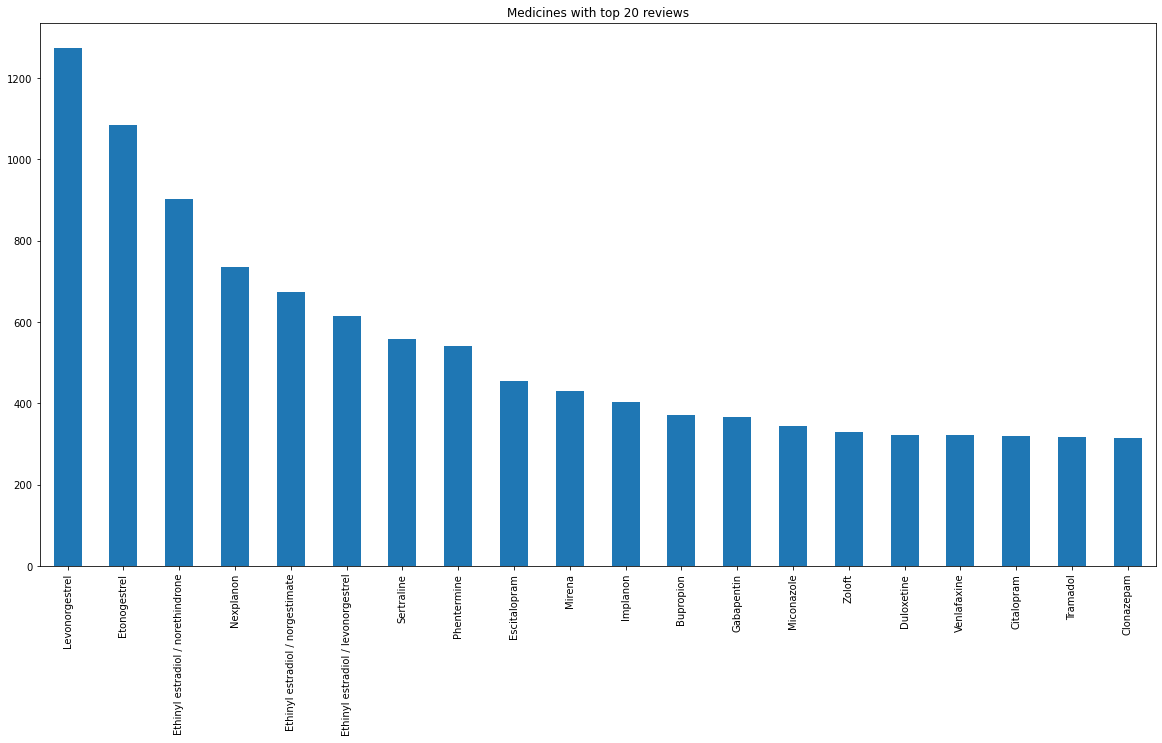

In [13]:
plt.figure(figsize=(20,10))
data1['Medicine'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Medicines with top 20 reviews')
plt.show()

In [14]:
###Cleaning the reviews column
##Text preperocessing
import nltk 
import string 
import re 
# remove punctuation 
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 

# remove whitespace from text 
def remove_whitespace(text): 
    return  " ".join(text.split()) 

# Remove numbers 
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result

def text_lowercase(text): 
    return text.lower() 


In [15]:
data1['Reviews']=data1['Reviews'].apply(remove_punctuation)
        

In [16]:
data1['Reviews']=data1['Reviews'].apply(remove_whitespace)

In [17]:
data1['Reviews']=data1['Reviews'].apply(remove_numbers)

In [18]:
med=data1['Medicine'].unique()
med=','.join([str(elem) for elem in med])
med=med.replace('/','')
med=remove_numbers(med)
med=remove_whitespace(med)
med=med.replace('.','')
med=med.replace('-','')
med=text_lowercase(med)

In [19]:
data1['Reviews']=data1['Reviews'].apply(text_lowercase)

In [20]:
##Cleaning condition column
data1.loc[data1['Condition']=='Diabetes, Type 2','Condition']='Diabetes, Type two'
data1.loc[data1['Condition']=='Diabetes, Type 1','Condition']='Diabetes, Type one'


In [21]:
data1['Condition']=data1['Condition'].apply(str)

In [22]:
data1['Condition']=data1['Condition'].apply(remove_numbers)

In [23]:
data1['Condition']=data1['Condition'].replace(to_replace='</span> users found this comment helpful.',value=np.nan)

Text(0.5, 1.0, 'Top 20 most reviewed conditions')

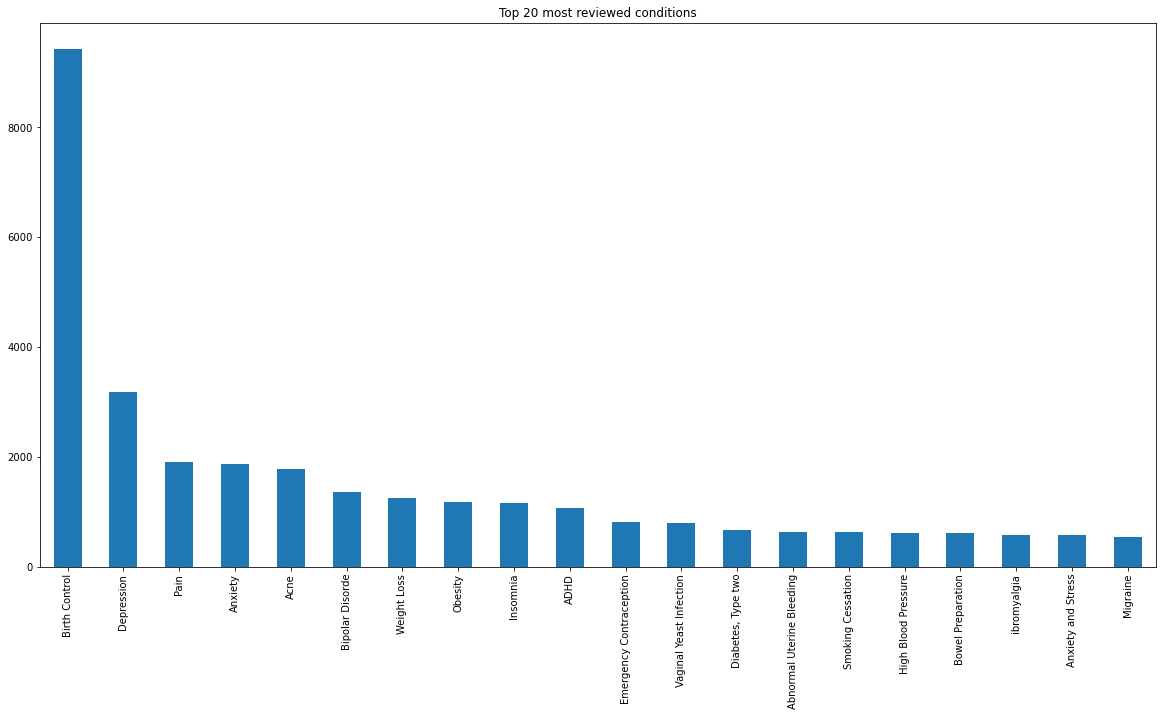

In [24]:
##Most reviewed conditions
data1['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title('Top 20 most reviewed conditions')

In [25]:
##Number of condidtions per medicine
g=data1.groupby(data1['Medicine'])['Condition'].nunique().nlargest(20)
g

Medicine
Gabapentin        27
Prednisone        26
Amitriptyline     20
Venlafaxine       19
Doxycycline       17
Duloxetine        17
Metronidazole     17
Ciprofloxacin     16
Naproxen          16
Sertraline        16
Bupropion         15
Clonazepam        15
Cymbalta          15
Risperidone       15
Azithromycin      14
Citalopram        14
Clarithromycin    14
Lamotrigine       14
Levofloxacin      14
Neurontin         14
Name: Condition, dtype: int64

Text(0.5, 1.0, 'Top 20 medicines with maximum conditions')

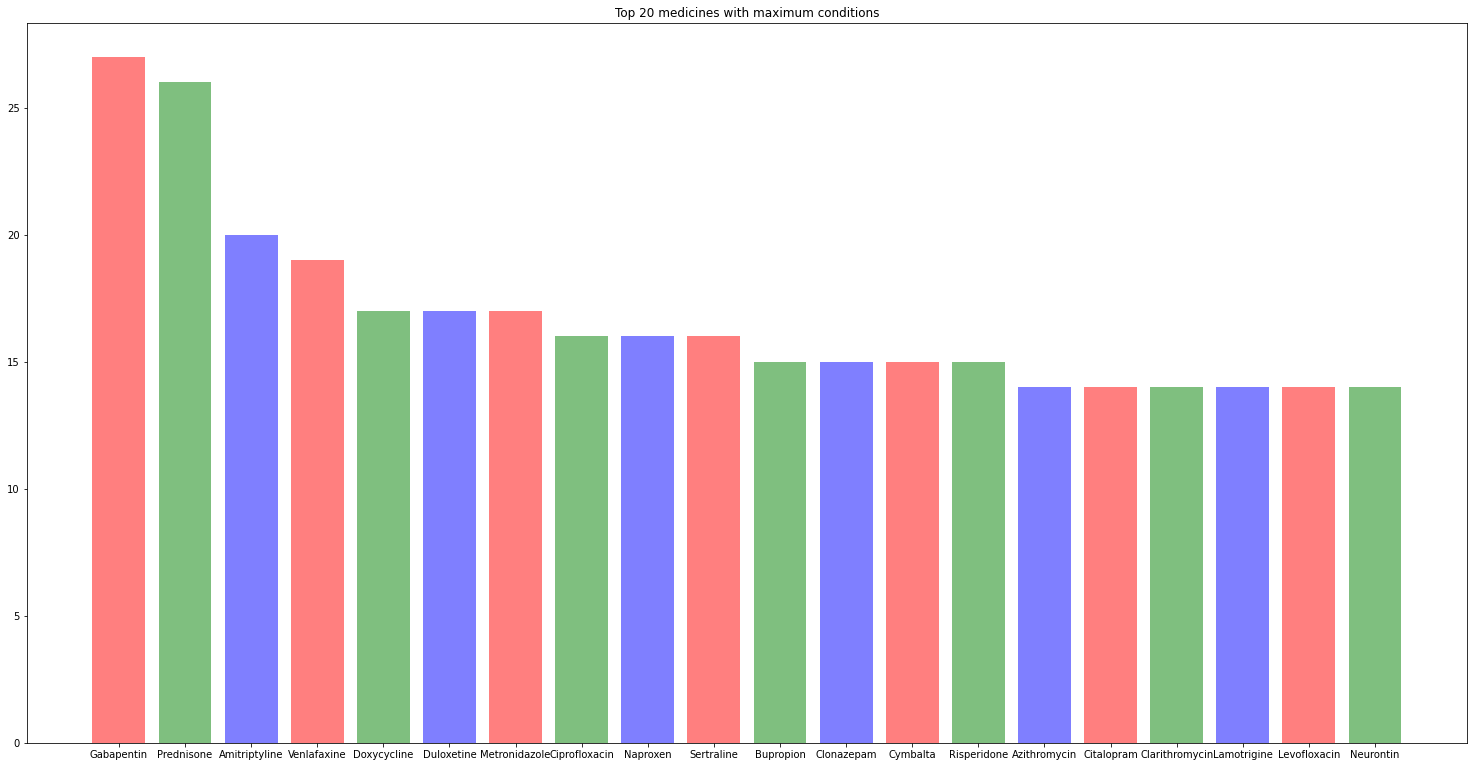

In [26]:
fig=plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(g.index,g.values,color='rgb',alpha=0.5)
plt.title('Top 20 medicines with maximum conditions')

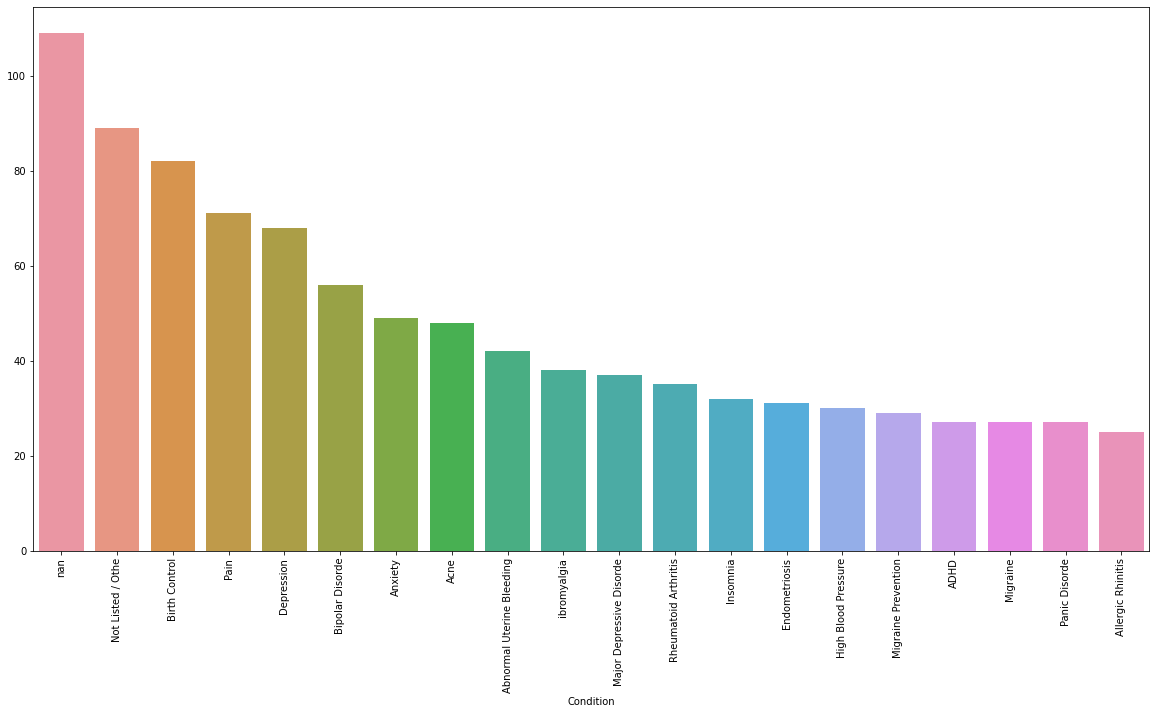

In [27]:
##How many medicines are available for top 20 medical condidtions?
m=data1.groupby(data1['Condition'])['Medicine'].nunique().nlargest(20)
plt.figure(figsize=(20,10))
sns.barplot(x=m.index,y=m.values,data=data1)
plt.xticks(rotation=90)
plt.show()
##Most of the conditions are not listed in the dataset followed by birthcontrol, depression,anxiety and acne.

In [28]:
##Emotion analysis on reviews
from nrclex import NRCLex 
def get_emotion(text):
    nrc=NRCLex(text)
    g=nrc.affect_list
    gh=[]
    [gh.append(i) for i in g if i not in gh]
    return str(gh)

In [29]:
def get_emotion_score(text):
    nrc=NRCLex(text)
    return nrc.affect_frequencies

In [30]:
get_emotion_score('I have used Prilosec for over 10 years, without any issue, however, my Doctor felt that Pantoprazole would be safer for me. Well not at all, after taking 1  pill a day for a 5 day period, I came down with severe abdominal pain, to the point that I could not roll out of my bed, the pain then move to my left shoulder, the the right, then my neck, then my hips. All of these within a 3 week period. I have been prescribed a muscles relaxer, I think that it has helps, but I still have the neck cramps and hip bone pains. be very careful with Pantoprazole')

{'fear': 0.16666666666666666,
 'anger': 0.0,
 'anticip': 0.0,
 'trust': 0.16666666666666666,
 'surprise': 0.0,
 'positive': 0.25,
 'negative': 0.25,
 'sadness': 0.16666666666666666,
 'disgust': 0.0,
 'joy': 0.0}

In [31]:
data1['Emotions']=data1['Reviews'].apply(get_emotion)

In [32]:
data1['Emotion_score']=data1['Reviews'].apply(get_emotion_score)

In [33]:
##Converting emotion column from list to string
data1['emotion_string'] =data1['Emotions'].apply(lambda x: x[1:-1])

In [34]:
data1=data1.drop(['Emotions'],axis=1)

In [35]:
text_object = NRCLex('@@'.join(data1['Reviews']))

In [36]:
text_object.affect_frequencies ##Negative sentiments slightly greater than positive sentiments

{'fear': 0.11172411546879,
 'anger': 0.06265883653622581,
 'anticip': 0.0,
 'trust': 0.10021957779902886,
 'surprise': 0.04483205057798631,
 'positive': 0.15176110080222346,
 'negative': 0.1791038294476718,
 'sadness': 0.1114716959964824,
 'disgust': 0.067292859966905,
 'joy': 0.07010475860465411,
 'anticipation': 0.1008311748000322}

In [37]:
text_object.top_emotions ##Negative sentiment is the most used sentiment in reviews overall

[('negative', 0.1791038294476718)]

In [38]:
emotion_scores = pd.DataFrame(list(text_object.raw_emotion_scores.items())) 

In [39]:
emotion_scores = emotion_scores.rename(columns={0: "Emotions", 1: "Count"})

In [40]:
import plotly.express as px 
fig = px.pie(emotion_scores, values='Count', names='Emotions',
             title='Emotion Scores')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [41]:
p=[i.values() for i in data1['Emotion_score']]
new=pd.DataFrame(list(p))

In [42]:
newy =new.rename(columns={0: "fear", 1: "anger",2:"anticipation",3:"trust",4:"surprise",5:"positive",6:"negative",7:"sadness",8:"disgust",9:"joy",10:"Anticipation"})
newy=newy.drop(['anticipation'],axis=1)

In [43]:
data1=data1.reset_index(drop=True)
newy['drug']=data1['Medicine']

In [44]:
features=['fear','anger','trust','surprise','positive','negative','sadness','disgust','joy','Anticipation']
med22=newy['drug'].value_counts().nlargest(10)
med22=med22.index.tolist()

In [45]:
dummy=newy[newy['drug'].isin(med22)]
dummy

fear     anger     trust  surprise  positive  negative   sadness  \
34     0.107143  0.107143  0.107143  0.000000  0.107143  0.214286  0.178571   
37     0.052632  0.026316  0.052632  0.078947  0.184211  0.210526  0.105263   
45     0.100000  0.100000  0.100000  0.050000  0.100000  0.150000  0.100000   
48     0.071429  0.071429  0.071429  0.000000  0.142857  0.142857  0.142857   
63     0.100000  0.050000  0.100000  0.100000  0.150000  0.150000  0.100000   
...         ...       ...       ...       ...       ...       ...       ...   
49089  0.107143  0.107143  0.035714  0.000000  0.142857  0.285714  0.250000   
49090  0.114286  0.085714  0.142857  0.000000  0.171429  0.142857  0.200000   
49091  0.083333  0.104167  0.104167  0.041667  0.145833  0.145833  0.125000   
49092  0.166667  0.111111  0.000000  0.000000  0.000000  0.277778  0.222222   
49093  0.176471  0.137255  0.019608  0.078431  0.058824  0.254902  0.137255   

        disgust       joy  Anticipation                               drug  
34     0.035714  0.035714      0.107143                       Escitalopram  
37     0.078947  0.078947      0.131579                     Levonorgestrel  
45     0.100000  0.075000      0.125000                       Etonogestrel  
48     0.071429  0.071429      0.214286                       Etonogestrel  
63     0.100000  0.050000      0.100000  Ethinyl estradiol / norethindrone  
...         ...       ...           ...                                ...  
49089  0.035714  0.000000      0.035714                         Sertraline  
49090  0.057143  0.000000      0.085714                         Sertraline  
49091  0.020833  0.083333      0.145833                         Sertraline  
49092  0.055556  0.000000      0.166667                         Sertraline  
49093  0.098039  0.019608      0.019608                         Sertraline  

[7271 rows x 11 columns]

In [46]:
fo=[]
for i in med22:
    fo.append(dummy.loc[dummy['drug']==i,features].mean())     

In [47]:
fo=pd.DataFrame(fo)
fo['drug_name']=med22

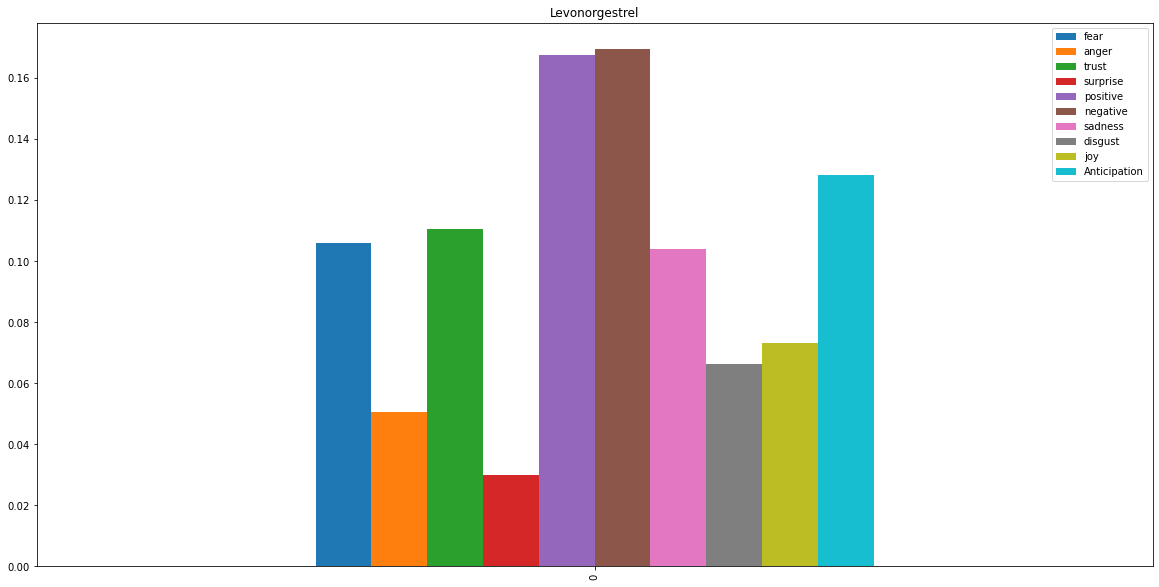

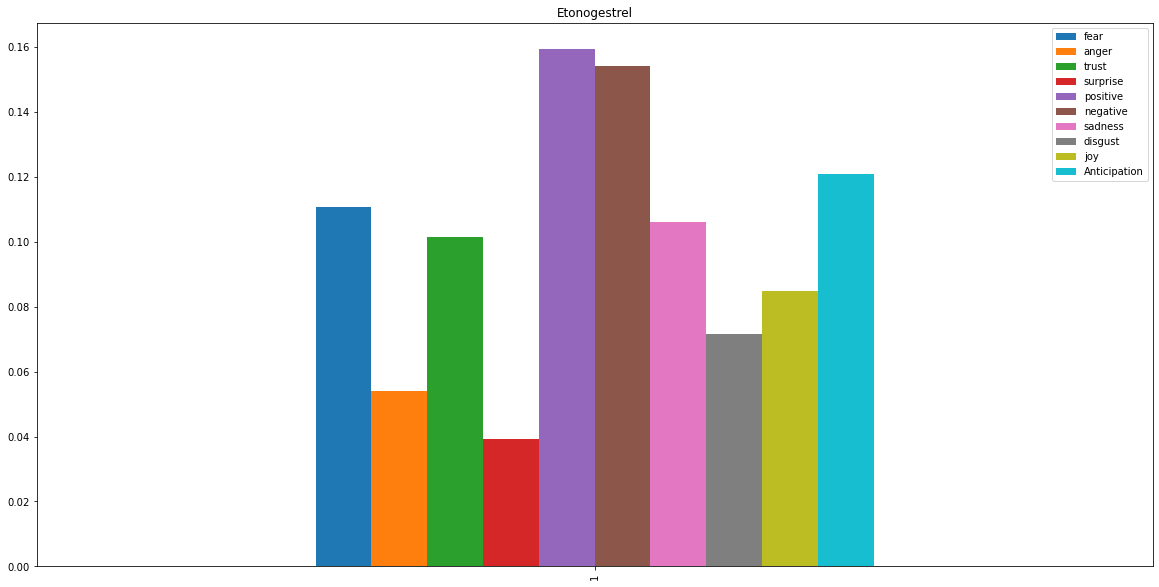

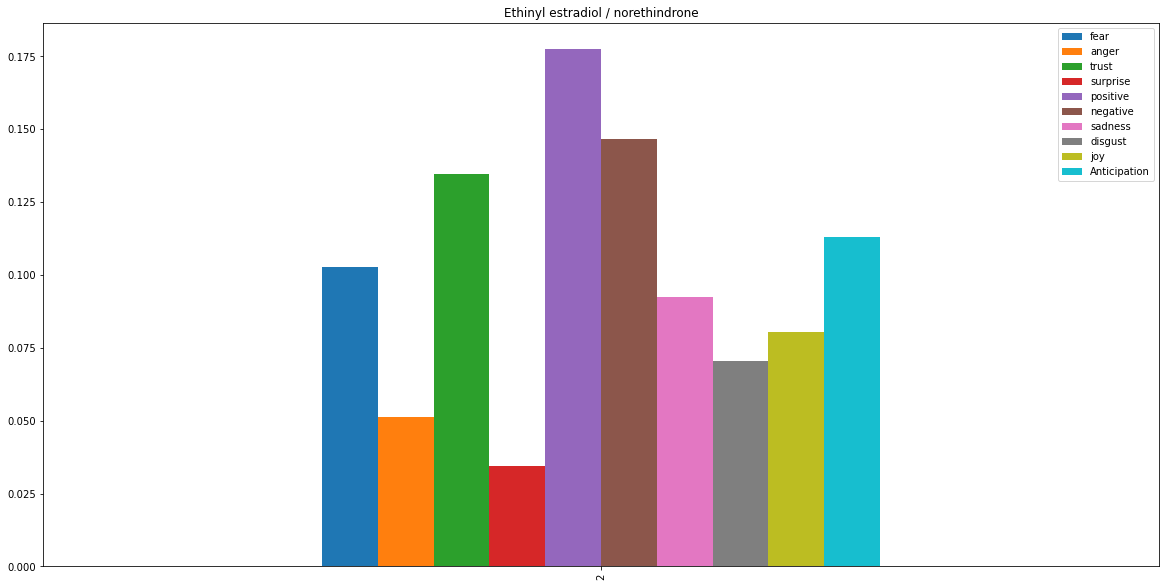

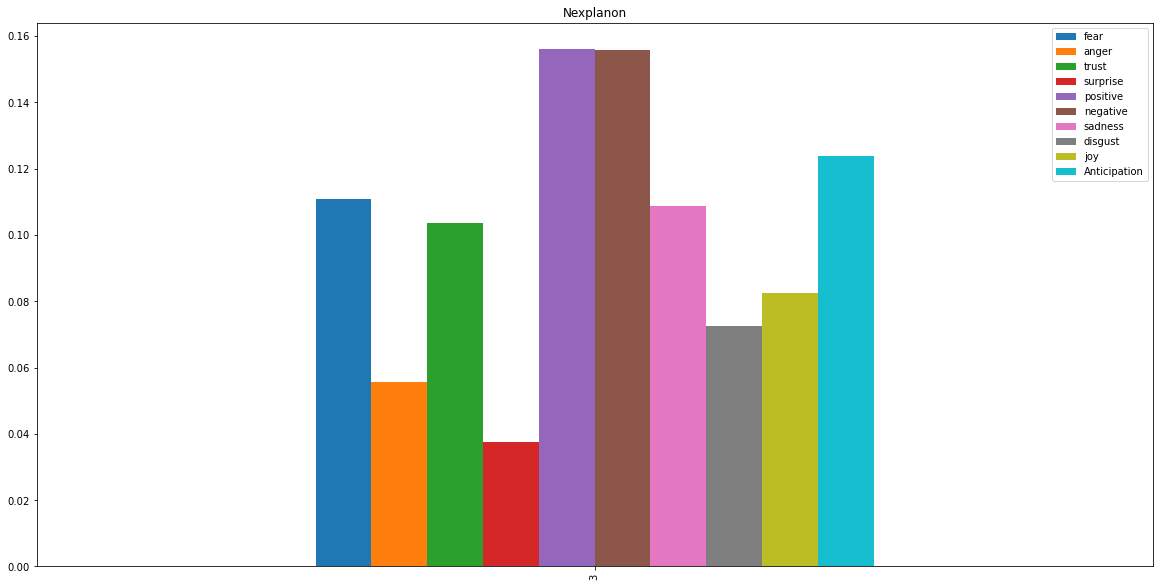

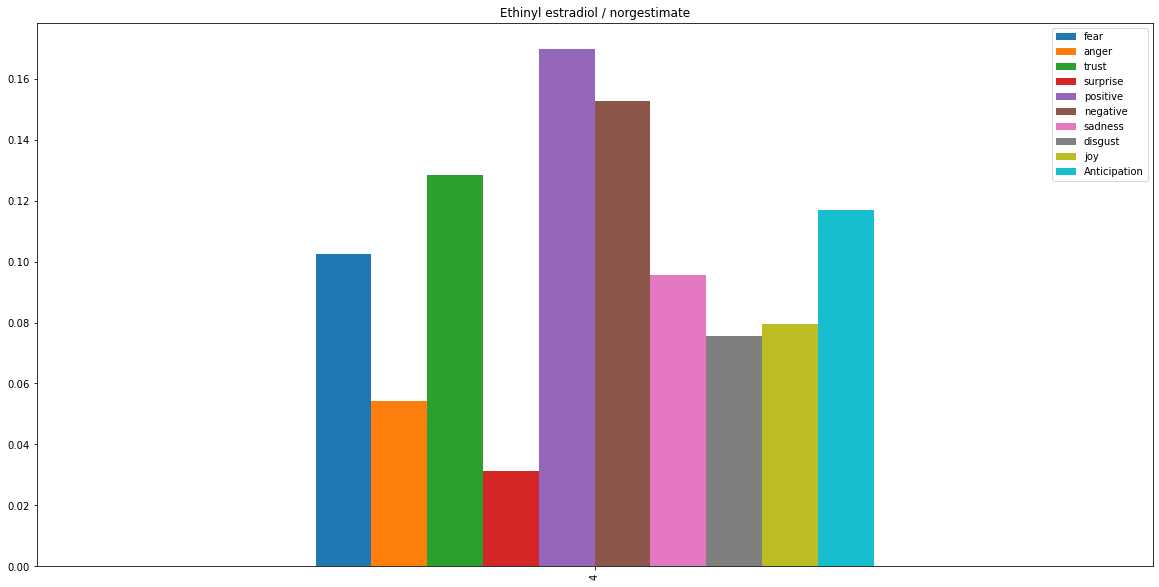

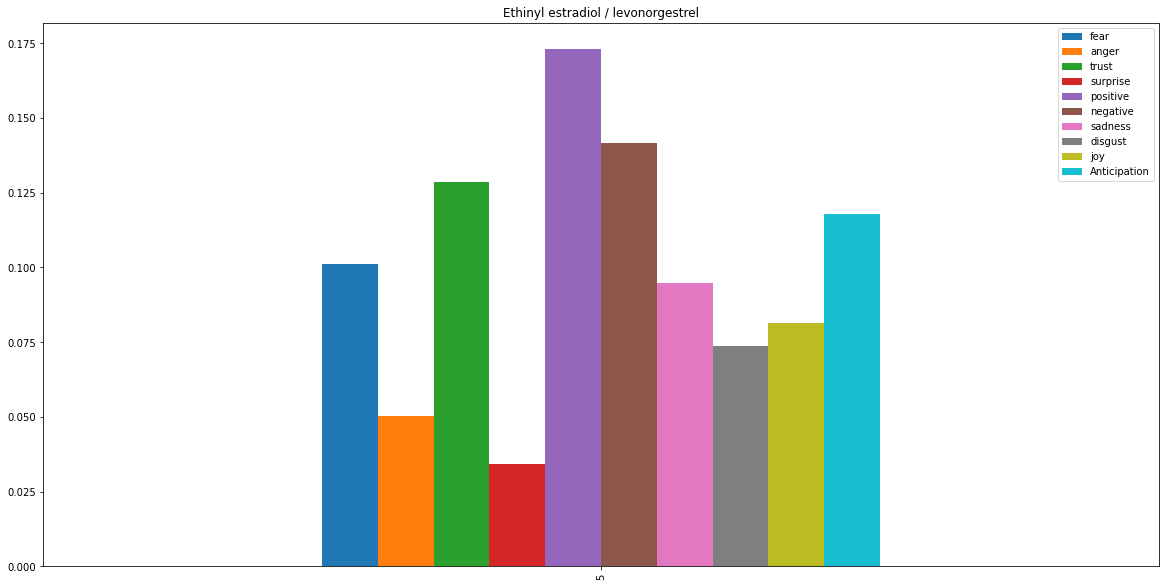

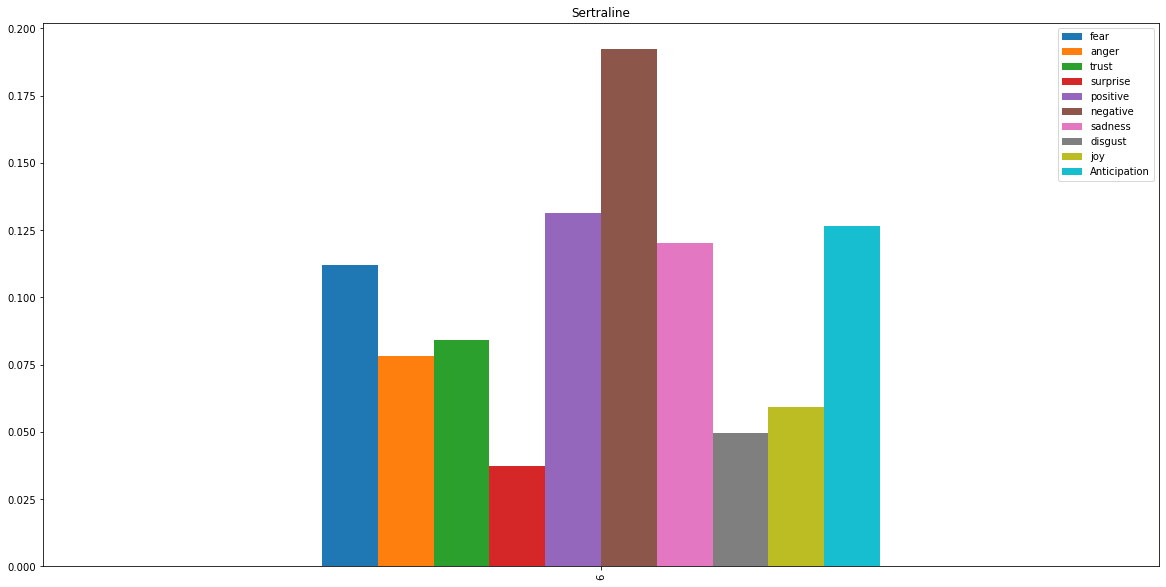

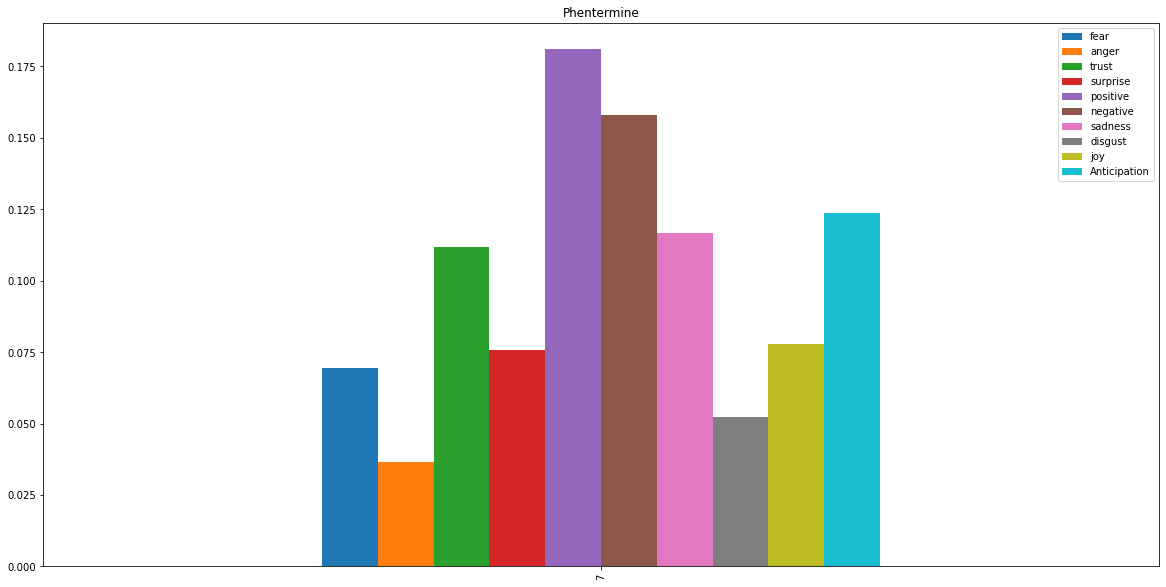

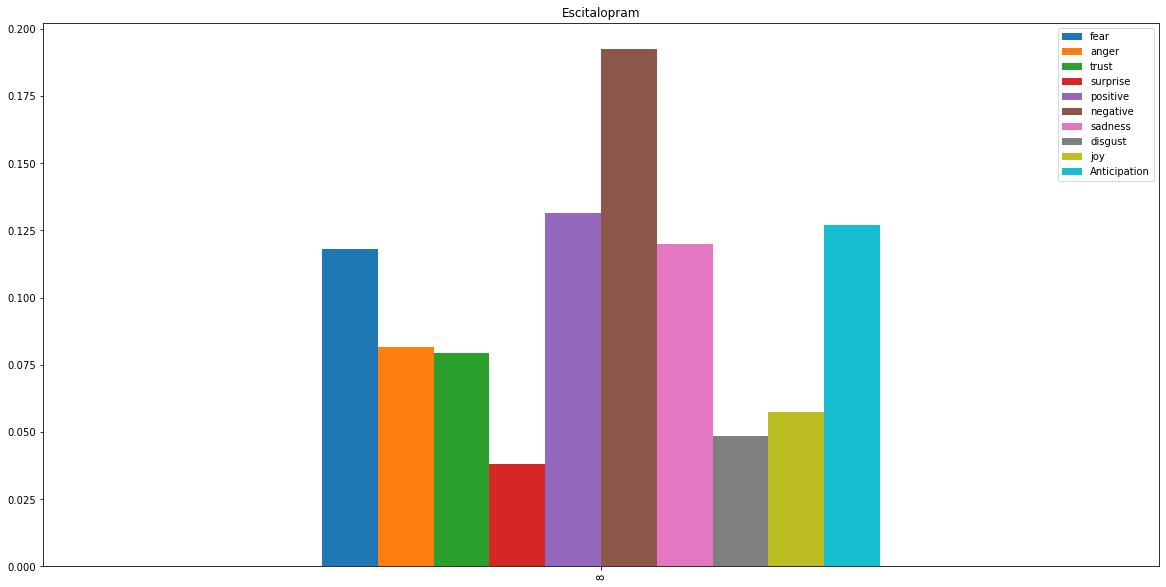

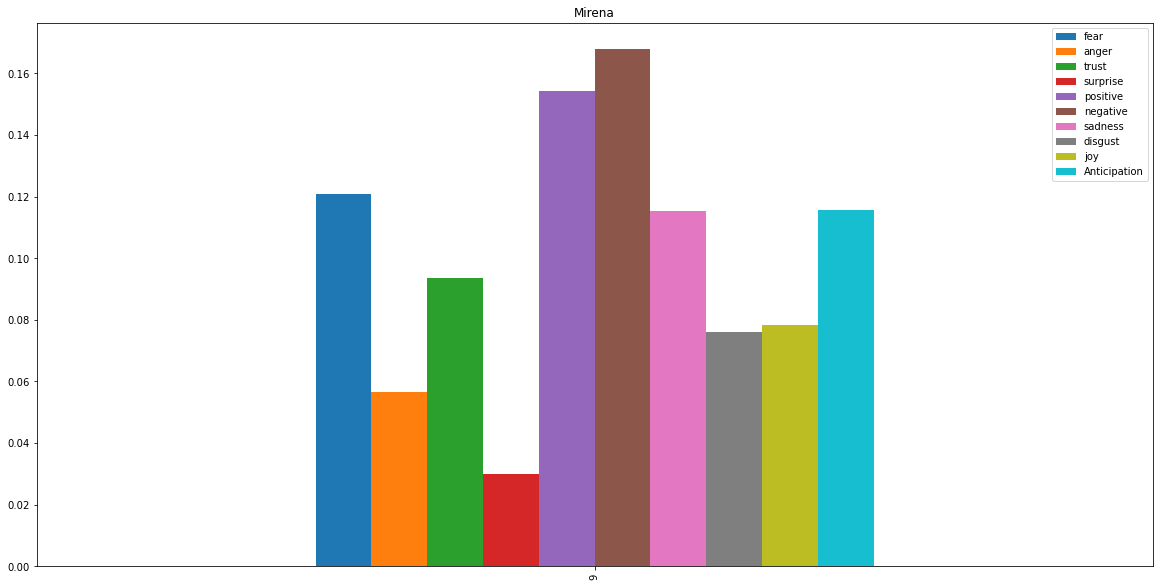

In [48]:
###Average emotions of top 10 most reviewed medicines
for i in fo['drug_name']:
    fo[fo['drug_name']==i].plot(kind='bar',figsize=(20,10))
    plt.title(i)
    plt.show()

In [49]:
data1=pd.concat([data1,newy],axis=1)
data1=data1.drop(['positive','negative'],axis=1)

In [50]:
###Finding polarity and class of sentiments(positive,negative and neutral) using textblob library
from textblob import TextBlob

In [51]:
def sentiment_polarity(text):
    af=TextBlob(text)
    return af.polarity

def sentiment_label(text):
    af=TextBlob(text)
    if af.polarity>0:
        result='Positive'
    elif af.polarity<0:
        result='Negative'
    else:
        result='Neutral'
    return result

In [52]:
data1['Sentiment score']=data1['Reviews'].apply(sentiment_polarity)

In [53]:
data1['Sentiment label']=data1['Reviews'].apply(sentiment_label)

<AxesSubplot:>

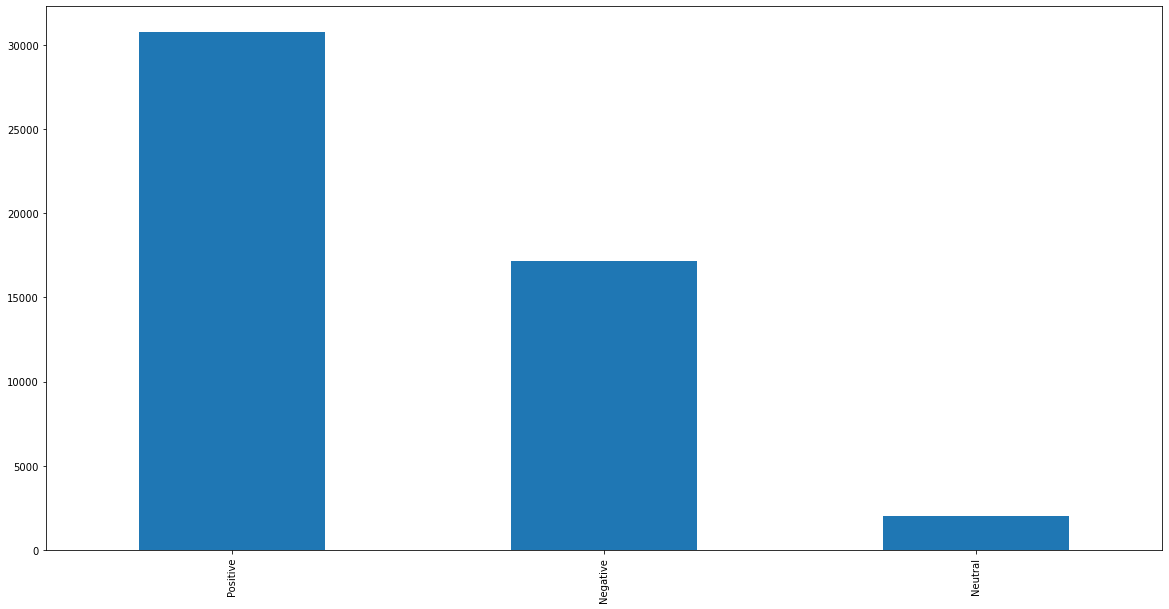

In [54]:
##How many positive and negative and neutral reviews?
data1['Sentiment label'].value_counts().plot(kind='bar',figsize=(20,10))


In [55]:
#Reviews are mostly positive in the whole dataset.Least talked about sentiment is neutral

In [56]:
hoo=[]
for i in med22:
    hoo.append(data1.loc[data1['Medicine']==i,'Sentiment label'].value_counts())

hoo=pd.DataFrame(hoo)
hoo['drug']=med22 
hoo

Positive  Negative  Neutral  \
Sentiment label       746       503       24   
Sentiment label       662       415        8   
Sentiment label       517       373       13   
Sentiment label       437       292        7   
Sentiment label       371       290       12   
Sentiment label       356       246       13   
Sentiment label       375       165       18   
Sentiment label       413       111       18   
Sentiment label       305       138       12   
Sentiment label       260       164        7   

                                               drug  
Sentiment label                      Levonorgestrel  
Sentiment label                        Etonogestrel  
Sentiment label   Ethinyl estradiol / norethindrone  
Sentiment label                           Nexplanon  
Sentiment label    Ethinyl estradiol / norgestimate  
Sentiment label  Ethinyl estradiol / levonorgestrel  
Sentiment label                          Sertraline  
Sentiment label                         Phentermine  
Sentiment label                        Escitalopram  
Sentiment label                              Mirena

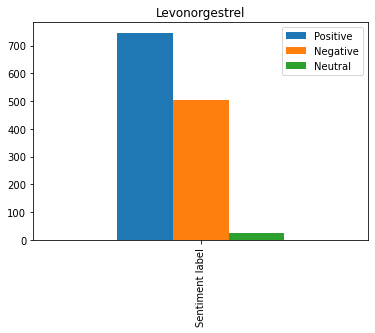

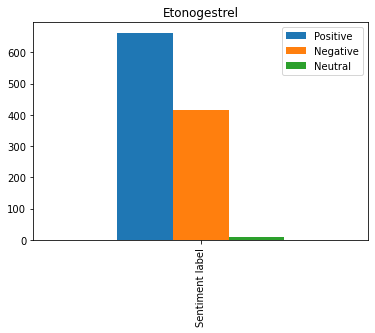

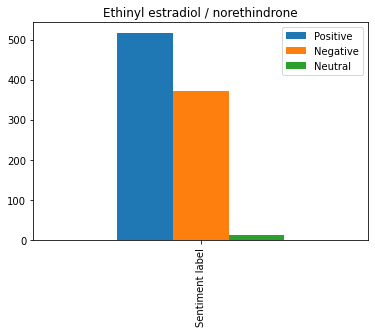

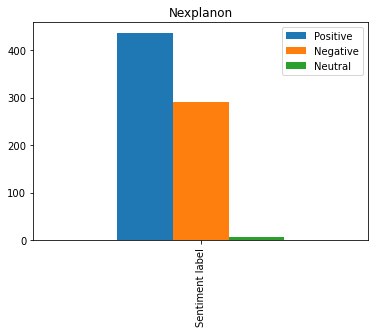

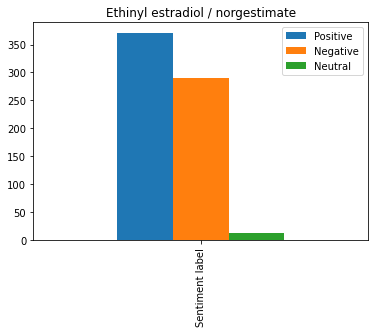

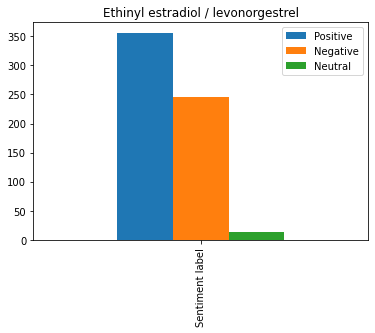

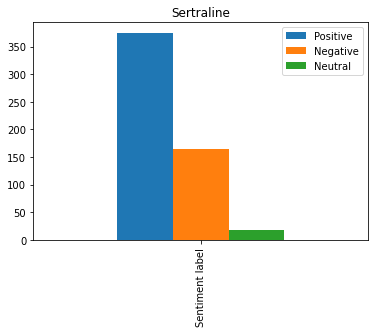

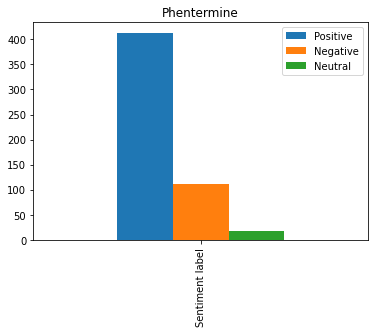

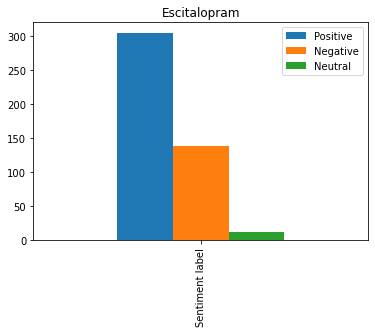

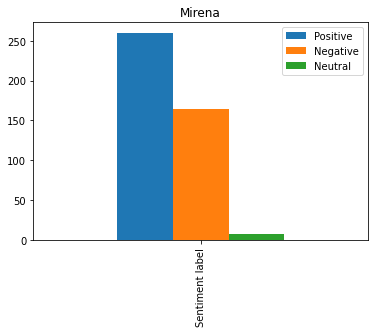

In [57]:
##how many positive,negative and neutral reviews do top 10 reviewed medicines have?
for i in hoo['drug']:
    hoo[hoo['drug']==i].plot(kind='bar')
    plt.title(i)
    plt.show()

In [58]:
##Feature engineering
##Positive sentiments are genuine from rating range of 6-10
##Negtive sentiments are genuine from the ratings ranging between 1-4
##Neutral can be considered 5 rate

In [59]:
genuine_good_review =data1[(data1['Ratings']>=6) &  (data1['Sentiment label'] == 'Positive')]
genuine_bad_review=data1[(data1['Ratings']<=4)  & (data1['Sentiment label'] == 'Negative')]  

In [60]:
non_genuine_good_review =data1[(data1['Ratings']<5) &  (data1['Sentiment label'] == 'Positive')]
non_genuine_bad_review=data1[(data1['Ratings']>6)  & (data1['Sentiment label'] == 'Negative')]  

In [61]:
non_genuine_bad_review

Medicine                 Condition  \
29                Suprep Bowel Prep Kit         Bowel Preparation   
35                              Campral        Alcohol Dependence   
40     Ethinyl estradiol / etonogestrel             Birth Control   
54                          Clindamycin                      Acne   
70                               Ultram                      Pain   
...                                 ...                       ...   
49697                Tretenion-tropical    Photoaging of the Skin   
49759                 Minoxidil Topical         Hairline thinning   
49781                 Minoxidil Topical         Hairline thinning   
49783                 Minoxidil Topical         Hairline thinning   
49803                 Minoxidil Topical         Hairline thinning   

                                                 Reviews  Ratings  \
29     this stuff wasnt too bad i had a hard time wit...      8.0   
35     been a heavy drinker for over  years since a m...     10.0   
40     i started on the oral contraceptive pill but g...     10.0   
54     i have had problems with acne off and on as a ...      8.0   
70     i have severe scar tissue and adhesions from m...     10.0   
...                                                  ...      ...   
49697  male  years been using tretinoin treatment sin...     10.0   
49759  i am getting incredible results at months  i a...     10.0   
49781   now been losing slowly since age  it got to a...     10.0   
49783  hi i had started minoxidil  on th jun along wi...      8.0   
49803  i have discontinued use of contraception pill ...      8.0   

                  Date  Useful Count  \
29           18-Feb-15            15   
35           23-Aug-13            55   
40           13-Dec-12             4   
54           13-Aug-16            32   
70           24-Feb-12            36   
...                ...           ...   
49697   March 28, 2020            22   
49759   April 20, 2017            16   
49781  August 22, 2016            17   
49783   August 9, 2016            52   
49803   March 14, 2015            36   

                                           Emotion_score  \
29     {'fear': 0.11538461538461539, 'anger': 0.11538...   
35     {'fear': 0.2, 'anger': 0.0, 'anticip': 0.0, 't...   
40     {'fear': 0.058823529411764705, 'anger': 0.0588...   
54     {'fear': 0.11538461538461539, 'anger': 0.03846...   
70     {'fear': 0.16666666666666666, 'anger': 0.09523...   
...                                                  ...   
49697  {'fear': 0.2, 'anger': 0.2, 'anticip': 0.0, 't...   
49759  {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...   
49781  {'fear': 0.09523809523809523, 'anger': 0.14285...   
49783  {'fear': 0.058823529411764705, 'anger': 0.0588...   
49803  {'fear': 0.08333333333333333, 'anger': 0.08333...   

                                          emotion_string      fear     anger  \
29     'anger', 'disgust', 'fear', 'negative', 'sadne...  0.115385  0.115385   
35                    'positive', 'fear', 'trust', 'joy'  0.200000  0.000000   
40     'positive', 'trust', 'anger', 'disgust', 'fear...  0.058824  0.058824   
54     'fear', 'negative', 'sadness', 'anger', 'disgu...  0.115385  0.038462   
70     'anger', 'disgust', 'fear', 'negative', 'sadne...  0.166667  0.095238   
...                                                  ...       ...       ...   
49697  'anger', 'disgust', 'fear', 'negative', 'sadness'  0.200000  0.200000   
49759  'anticipation', 'joy', 'positive', 'trust', 'n...  0.000000  0.000000   
49781  'anger', 'negative', 'sadness', 'positive', 'f...  0.095238  0.142857   
49783  'negative', 'anticipation', 'joy', 'positive',...  0.058824  0.058824   
49803  'positive', 'trust', 'anger', 'negative', 'sad...  0.083333  0.083333   

          trust  surprise   sadness   disgust       joy  Anticipation  \
29     0.038462  0.000000  0.153846  0.192308  0.038462      0.038462   
35     0.200000  0.000000  0.000000  0.000000  0.200000         

In [62]:
##There are around 4893 rows that have ratings less than 5 and are labelled 'positive'. Similarly,there are around 8050 rows that
##have ratings more than 6 and are labelled 'negative'. Therefore we will replace the wrong labelled sentiments.

<AxesSubplot:xlabel='Ratings', ylabel='Sentiment label'>

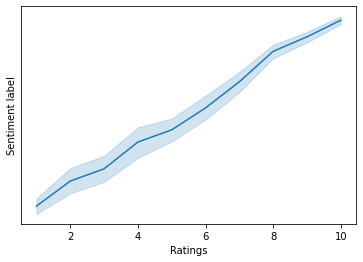

In [63]:
##Finding correlation between rating and sentiment SCORE before replacing labels from genuine good/bad reviews
sns.lineplot(data=data1,x='Ratings',y='Sentiment label')

In [64]:
##Correlation between rating and Sentiment label using Spearman correaltion
from scipy.stats import spearmanr
coef, p = spearmanr(data1['Ratings'],data1['Sentiment label'])
print('Spearmans correlation coefficient: %.3f' % coef)   ##correlation value-0.282

Spearmans correlation coefficient: 0.282


In [65]:
##Imputing missing rating values using mean/median of genuine good and bad reviews data:
##Finding mean values from genuine good reviews dataframe 
genuine_good_review['Ratings'].mean()  ##mean=9

##Finding mean values from genuine bad reviews dataframe 
genuine_bad_review['Ratings'].mean()  ##mean=1.76

1.767707752370329

In [66]:
##Replacing wrongly sentiment labels with correct labels usiing feature engineering technique mentioned above
data1.loc[data1.Ratings<=4,'Sentiment label']='Negative'
data1.loc[data1.Ratings>=6,'Sentiment label']='Positive'

In [67]:
data1.loc[data1['Sentiment label']=='Neutral','Ratings'].mean() ##Mean of neutral ratings=5

5.0

In [68]:
##Imputing ratings based on positive negative and neutral sentiments
data1.Ratings[(data1['Ratings'].isnull())&(data1['Sentiment label']=='Positive')] =9
data1.Ratings[(data1['Ratings'].isnull())&(data1['Sentiment label']=='Negative')] =1.76
data1.Ratings[(data1['Ratings'].isnull())&(data1['Sentiment label']=='Neutral')] =5

<AxesSubplot:xlabel='Sentiment label'>

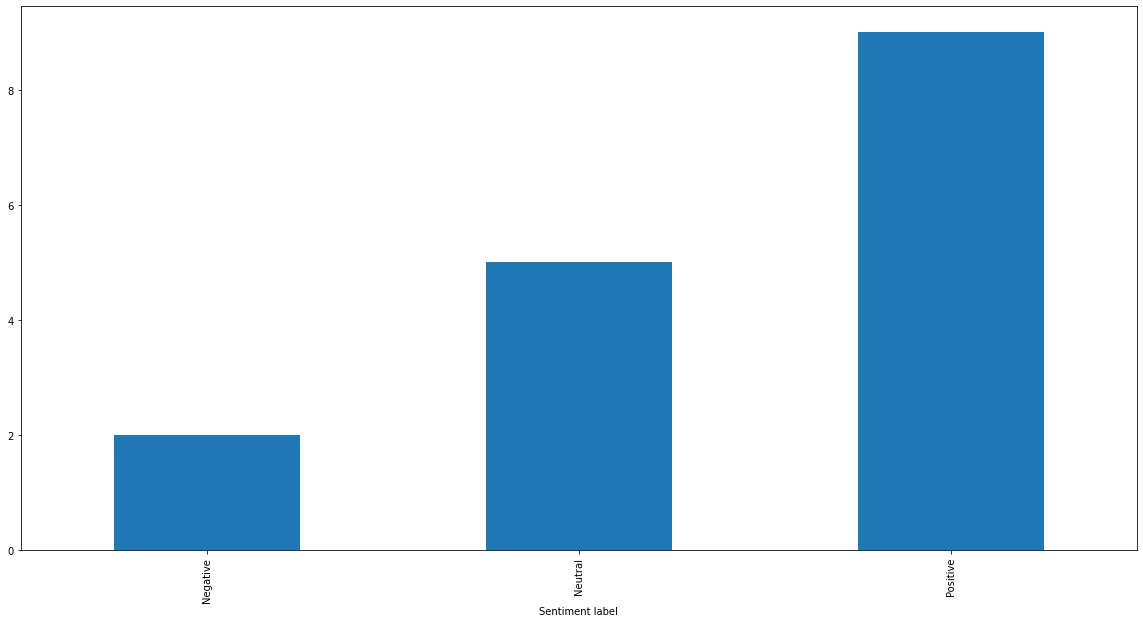

In [69]:
data1.groupby(data1['Sentiment label'])['Ratings'].median().plot(kind='bar',figsize=(20,10))

In [70]:
##As expected positive sentiments have the highest ratings and negative sentiments have the lowest ratings

<AxesSubplot:xlabel='Ratings', ylabel='Sentiment label'>

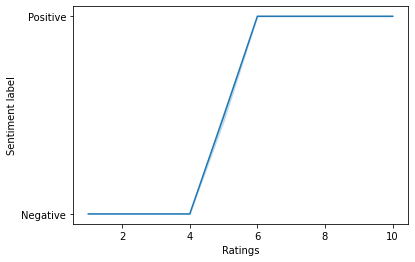

In [71]:
##Finding correlation between rating and sentiment SCORE after replacing labels from genuine good/bad reviews
sns.lineplot(data=data1,x='Ratings',y='Sentiment label')

In [72]:
##Correlation between rating and Sentiment label using Spearman correaltion
from scipy.stats import spearmanr
coef, p = spearmanr(data1['Ratings'],data1['Sentiment label'])
print('Spearmans correlation coefficient: %.3f' % coef) ##0.792
##Correlation between ratings and sentiment label increases after replacing wrong labels.

Spearmans correlation coefficient: 0.792


In [73]:
##Average rating of top 10 medicines
rate=[]
for i in med22:
    rate.append(data1.loc[data1['Medicine']==i,'Ratings'].mean())
    
rate=pd.DataFrame(rate)
rate['drug']=med22

Text(0.5, 1.0, 'Average rating of 10 most reviewed reviewed drugs')

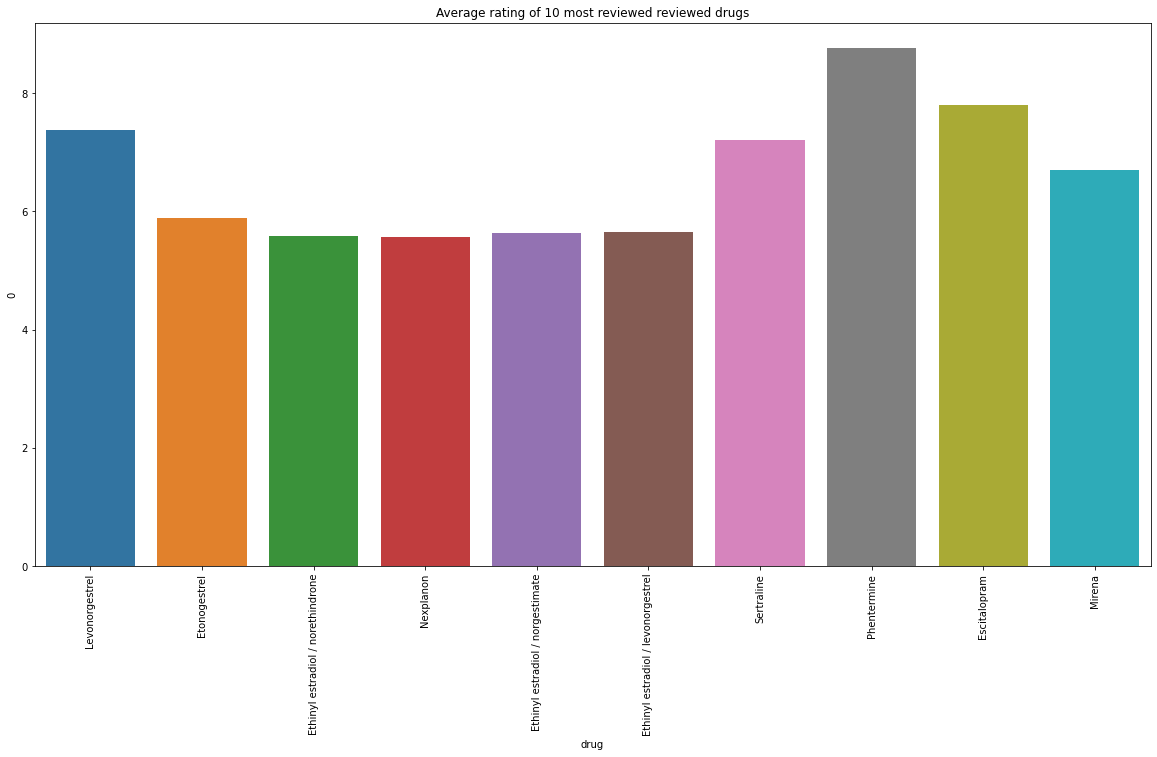

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x=rate['drug'],y=rate[0],data=rate)
plt.xticks(rotation=90)
plt.title('Average rating of 10 most reviewed reviewed drugs')

In [75]:
uc=[]
for i in med22:
    uc.append(data1.loc[data1['Medicine']==i,'Useful Count'].sum())
uc=pd.DataFrame(uc)
uc['drug']=med22
uc

0                                drug
0  14827                      Levonorgestrel
1   7959                        Etonogestrel
2   7535   Ethinyl estradiol / norethindrone
3   4525                           Nexplanon
4   5626    Ethinyl estradiol / norgestimate
5   4442  Ethinyl estradiol / levonorgestrel
6  26612                          Sertraline
7  15120                         Phentermine
8  16522                        Escitalopram
9   5449                              Mirena

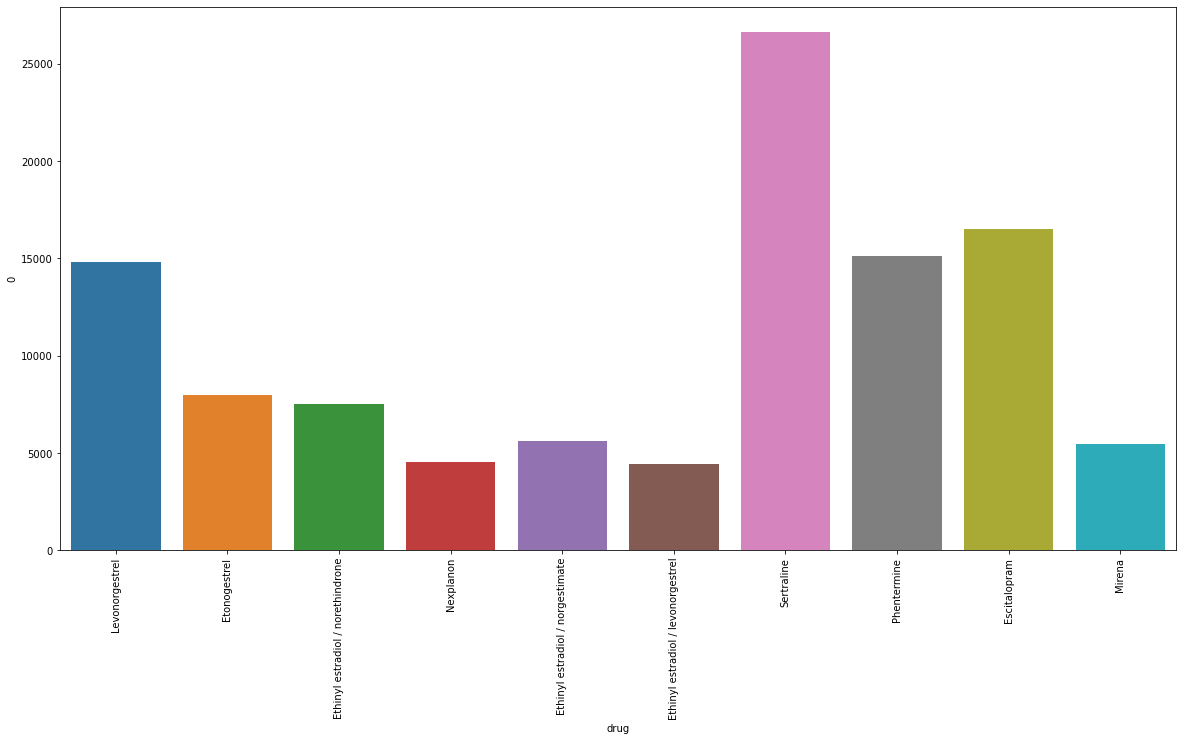

In [76]:
##Number of useful counts of top 10 drugs
plt.figure(figsize=(20,10))
sns.barplot(x=uc['drug'],y=uc[0],data=uc)
plt.xticks(rotation=90)
plt.show()

In [77]:
##Correlation between rating and useful count using Spearman correaltion
from scipy.stats import spearmanr
coef, p = spearmanr(data1['Ratings'],data1['Useful Count'])
print('Spearmans correlation coefficient: %.3f' % coef) ##0.289

Spearmans correlation coefficient: 0.289


<AxesSubplot:xlabel='Ratings', ylabel='Useful Count'>

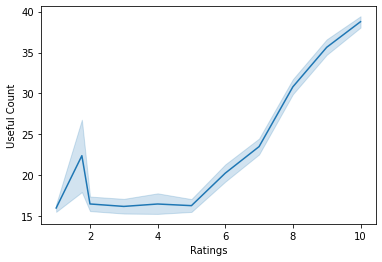

In [78]:
sns.lineplot(data=data1,x='Ratings',y='Useful Count')

In [79]:
###Correlation value is 0.3, also the graph shows fluctuating pattern where useful count increases with increase
##in ratings from 5 to 10

<AxesSubplot:xlabel='Sentiment label'>

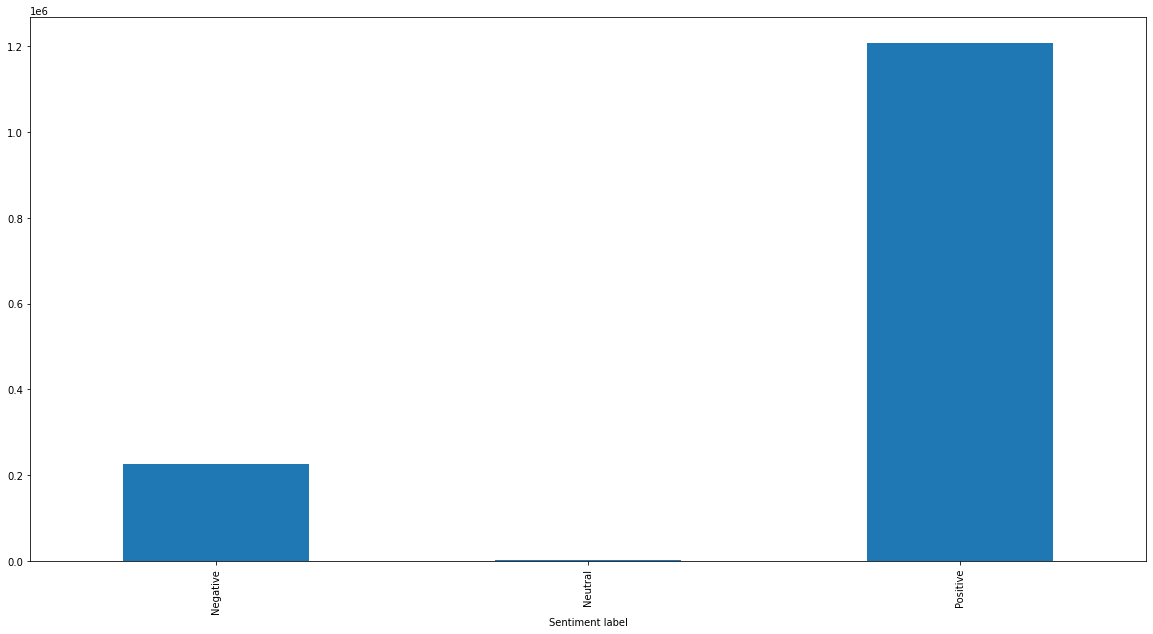

In [80]:
##Correlation between sentiments and useful count
data1.groupby(data1['Sentiment label'])['Useful Count'].sum().plot(kind='bar',figsize=(20,10))

In [81]:
###Positive reviews have high number of useful count

In [82]:
##Text preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

##Here after analysing corpus list we find that many unnecessary words are not present in stopwords dictionary.So, we build a function to
##remove further stopwords.
med420=med.split(',')
med420=set(med420)
stopwords =set(stopwords.words("english"))
new_stopwords=(('ive','tried','id','mg','else','took','decide','decided','went','asap','however','med','im','would','could','still','entire','put','one','day','month','within','whole','time','work','want','since','tried','whole','using','use','every','night','taking','take','get','got','year','week'))
new_stopwords_list =stopwords.union(new_stopwords)
cached_stopwords=new_stopwords_list.union(med420)

In [83]:
wordnet=WordNetLemmatizer()
corpus = []
for i in range(len(data1['Reviews'])):
    review = re.sub('[^a-zA-Z]', ' ',data1.Reviews[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in cached_stopwords]
    review = ' '.join(review)
    corpus.append(review)


In [84]:
data1["normalized_text_new"]=corpus

In [85]:
##Creating column for counting words in the review
data1['word_count'] =data1['normalized_text_new'].apply(lambda x: len(str(x).split(" ")))

In [86]:
drug_new=data1['Medicine'].unique()

In [87]:
ngram_data=data1.groupby(data1['Medicine'])['normalized_text_new'].agg(''.join).reset_index()
ngram_data

Medicine  \
0    Abacavir / dolutegravir / lamivudine   
1                                 Abilify   
2                                  Abreva   
3                             Acamprosate   
4                                Accutane   
..                                    ...   
772                                 Zyban   
773                               Zyprexa   
774                                Zyrtec   
775                                  ella   
776                             tretinoin   

                                   normalized_text_new  
0    discovered new status july vl k cd week blood ...  
1    pay load pocket slowly found hypermanic state ...  
2    product make cold sore worse made pimple sized...  
3    bad binge drinker last nine year going bender ...  
4    already commented wanted everyone know roacuta...  
..                                                 ...  
772  quit many occasion prior friend smoked pack qu...  
773  mar till aug first seemed like mellowing bit s...  
774  cholinergic urticaria year break hive start ex...  
775  hello stranger share experience emergency cont...  
776  acne started hopeful cannot see result yet rat...  

[777 rows x 2 columns]

In [88]:
from wordcloud import WordCloud, STOPWORDS 
##Plotting function to generate wordcloud
def wordcloud(char,color):
    plt.subplots(figsize=(10,10))
    wc = WordCloud(stopwords=STOPWORDS,background_color="black", contour_width=2, contour_color=color,max_words=2000, max_font_size=256,random_state=42)
    wc.generate(' '.join(char['normalized_text_new']))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

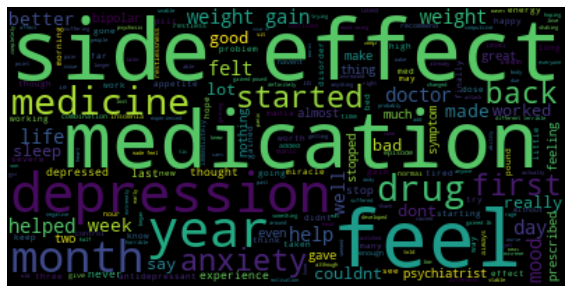

In [89]:
##Plotting unigram worcloud for all unique drugs.
wordcloud(data1.loc[data1['Medicine']=='Abilify'],'black') ##Abilify

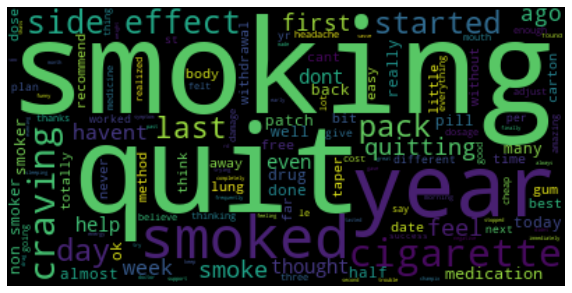

In [90]:
wordcloud(data1.loc[data1['Medicine']=='Zyban'],'black')  ##Zyban

In [91]:
##Similarly one can find unigram wordcloud for various unique drugs using the wordcloud function

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [93]:
##Creating unigram for top 50 words for all drugs
unigram=[]
for i in drug_new:
    unigram.append(get_top_n_words(data1.loc[data1['Medicine']==i,'normalized_text_new'],50))

In [94]:
unigram=pd.DataFrame(unigram)
unigram

0              1                 2               3   \
0          (sleep, 163)  (anxiety, 95)  (depression, 91)    (effect, 82)   
1            (year, 31)   (effect, 27)        (side, 25)   (symptom, 22)   
2       (infection, 38)      (day, 24)      (effect, 21)      (side, 20)   
3             (lb, 184)  (weight, 179)     (effect, 179)     (side, 175)   
4         (period, 222)     (iud, 168)      (cramp, 127)     (pain, 116)   
..                  ...            ...               ...             ...   
772     (tenofovir, 13)     (side, 10)      (effect, 10)       (year, 7)   
773  (constipation, 16)      (day, 16)       (bowel, 14)  (movement, 14)   
774          (skin, 41)     (acne, 36)        (week, 17)      (face, 17)   
775          (skin, 35)     (acne, 17)        (week, 17)      (face, 17)   
776         (hair, 303)    (month, 94)     (started, 60)   (rogaine, 55)   

                 4                5              6                 7   \
0        (feel, 73)       (year, 62)     (side, 62)        (like, 60)   
1       (crohn, 20)  (diagnosed, 18)  (colitis, 18)       (flare, 18)   
2    (medicine, 20)       (acne, 18)   (doctor, 18)  (prescribed, 17)   
3    (started, 167)      (lost, 164)   (pound, 125)      (first, 114)   
4        (day, 112)  (insertion, 98)    (month, 96)        (like, 83)   
..              ...              ...            ...               ...   
772       (pain, 6)         (hiv, 5)      (load, 5)  (combination, 5)   
773    (doctor, 11)         (go, 11)     (like, 10)        (pain, 10)   
774    (pimple, 13)       (like, 12)    (purge, 12)        (also, 12)   
775    (pimple, 13)       (like, 12)    (purge, 12)        (also, 12)   
776      (used, 54)       (side, 41)  (product, 37)      (effect, 37)   

                8               9   ...              40               41  \
0       (help, 57)     (month, 56)  ...  (sleeping, 27)       (made, 26)   
1      (month, 17)      (life, 14)  ...        (ups, 7)         (far, 6)   
2       (back, 16)      (felt, 15)  ...      (never, 7)        (gave, 7)   
3      (feel, 113)      (eat, 105)  ...       (far, 44)      (thing, 44)   
4      (first, 81)  (cramping, 80)  ...    (normal, 37)     (second, 37)   
..             ...             ...  ...             ...              ...   
772   (problem, 4)      (issue, 4)  ...      (noted, 2)        (well, 2)   
773      (hour, 9)      (thing, 9)  ...        (gas, 5)       (enema, 5)   
774    (retin, 11)   (started, 10)  ...       (give, 5)      (result, 4)   
775  (started, 10)     (cream, 10)  ...     (result, 4)  (experience, 4)   
776    (scalp, 37)       (new, 34)  ...      (know, 17)     (little, 16)   

                      42               43                  44             45  \
0             (wake, 26)     (worked, 25)         (didnt, 25)  (feeling, 25)   
1               (bad, 6)        (also, 6)           (feel, 6)    (longer, 6)   
2              (cyst, 7)     (working, 7)         (seemed, 7)  (horrible, 7)   
3             (even, 43)       (good, 42)  (constipation, 41)     (diet, 40)   
4              (sex, 37)  (paraguard, 37)          (side, 36)   (effect, 34)   
..                   ...              ...                 ...            ...   
772             (gfr, 2)       (close, 2)          (month, 2)    (number, 1)   
773     (recommended, 4)         (ago, 4)           (make, 4)     (issue, 4)   
774      (experience, 4)         (two, 4)           (away, 4)  (negative, 4)   
775             (two, 4)        (away, 4)       (negative, 4)      (side, 4)   
776  (dermatologist, 16)    (noticed, 16)       (getting, 16)     (full, 16)   

                46             47           48              49  
0      (slept, 24)  (nothing, 23)   (dont, 22)      (give, 22)  
1     (another, 6)     (stool, 6)  (normal, 6)     (apriso, 6)  
2        (rash, 7)      (away, 6)   (didnt, 6)       (utis, 6)  
3    (feeling, 40)    (think, 39)  (water, 39)  (exercise, 39)  
4    (heavier, 33)     (even, 32

In [95]:
unigram=unigram.set_index(drug_new)

In [96]:
unigram.to_csv('D:\\GREAT LEARNING(EXCELR)\\Unigram_new.csv',index=True)

In [97]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [98]:
##Creating bigram for top 50 words for all drugs
bigram=[]
for i in drug_new:
    bigram.append(get_top_n_bigram(data1.loc[data1['Medicine']==i,'normalized_text_new'],50))

In [99]:
bigram=pd.DataFrame(bigram)

In [100]:
bigram=bigram.set_index(drug_new)
bigram

0                         1   \
Mirtazapine            (side effect, 60)         (weight gain, 22)   
Mesalamine             (side effect, 24)  (ulcerative colitis, 11)   
Bactrim                (side effect, 20)              (go away, 4)   
Contrave              (side effect, 164)          (lost pound, 57)   
Copper               (birth control, 65)         (side effect, 32)   
...                                  ...                       ...   
Emtricitabine          (side effect, 10)           (viral load, 3)   
MiraLAX             (bowel movement, 11)          (side effect, 6)   
tretinoin           (photoaging skin, 6)          (side effect, 4)   
Tretenion-tropical      (side effect, 4)            (feel like, 4)   
Minoxidil Topical      (side effect, 32)           (hair loss, 27)   

                                         2                     3   \
Mirtazapine                (help sleep, 17)       (feel like, 14)   
Mesalamine             (diagnosed crohn, 7)         (year ago, 7)   
Bactrim                  (hormonal acne, 4)  (sinus infection, 4)   
Contrave                      (lost lb, 54)     (weight loss, 31)   
Copper                   (heavy period, 19)       (felt like, 17)   
...                                     ...                   ...   
Emtricitabine                  (load cd, 3)         (two year, 2)   
MiraLAX             (doctor recommended, 3)        (lot water, 3)   
tretinoin                    (feel like, 4)       (first week, 3)   
Tretenion-tropical          (first week, 3)       (see result, 2)   
Minoxidil Topical            (new hair, 20)       (hair fall, 14)   

                                          4                     5   \
Mirtazapine         (depression anxiety, 11)     (fall asleep, 11)   
Mesalamine                    (flare ups, 7)      (weight loss, 4)   
Bactrim               (bladder infection, 4)      (lemon juice, 3)   
Contrave                   (lose weight, 29)       (dry mouth, 22)   
Copper                     (never child, 14)  (hormonal birth, 13)   
...                                      ...                   ...   
Emtricitabine                 (year side, 2)       (noted side, 2)   
MiraLAX                   (milk magnesia, 3)        (month ago, 2)   
tretinoin                    (acne retin, 3)      (retin micro, 3)   
Tretenion-tropical             (two week, 2)      (skin really, 2)   
Minoxidil Topical            (bald spot, 12)     (losing hair, 11)   

                                        6                       7   \
Mirtazapine             (helped sleep, 11)         (felt like, 10)   
Mesalamine                (normal life, 4)      (crohn disease, 3)   
Bactrim                (skin infection, 3)     (emergency room, 3)   
Contrave                   (feel like, 17)         (full dose, 17)   
Copper                  (period cramp, 13)      (first period, 13)   
...                                    ...                     ...   
Emtricitabine       (tenofovir started, 2)           (hiv load, 2)   
MiraLAX                     (make sure, 2)       (extreme pain, 2)   
tretinoin                   (acne week, 3)       (acne started, 2)   
Tretenion-tropical      (negative side, 2)  (almost completely, 2)   
Minoxidil Topical           (see hair, 10)      (hair started, 10)   

                                            8                     9   ...  \
Mirtazapine                      (year ago, 9)       (sleep hour, 7)  ...   
Mesalamine                   (bloody stool, 3)   (bowel movement, 3)  ...   
Bactrim                     (urinary tract, 3)  (tract infection, 3)  ...   
Contrave                      (month lost, 15)       (felt like, 14)  ...   
Copper                      (iud inserted, 12)     (period last, 11)  ...   
...                                        ...                   ...  ...   
Emtricitabine       (tenofovir combination, 2)   (great medicine, 2)  ...   
MiraLAX                        (painful bm, 2)       (really bad, 2)  

In [101]:
bigram.to_csv('D:\\GREAT LEARNING(EXCELR)\\bigram_new.csv',index=True)

In [102]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [103]:
##Creating trigram for top 50 words for all drugs
trigram=[]
for i in drug_new:
    trigram.append(get_top_n_trigram(data1.loc[data1['Medicine']==i,'normalized_text_new'],50))

In [104]:
trigram=pd.DataFrame(trigram)
trigram=trigram.set_index(drug_new)
trigram.to_csv('D:\\GREAT LEARNING(EXCELR)\\trigram_new.csv',index=True)

In [105]:
from pandas import DataFrame

In [106]:
def plot(x,char,name,w,p):
    common_words = x(data1.loc[data1['Medicine']==char,'normalized_text_new'], 20)
    common_words_df = DataFrame(common_words,columns=['word','freq'])
    plt.figure(figsize=(16, 10))
    sns.barplot(x='word', y='freq',data=common_words_df,palette=p)
    plt.title("Top 20 "+w+" used by "+name, fontsize=16)
    plt.ylabel("Frequency", fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90, fontsize=13)
    plt.xlabel("");

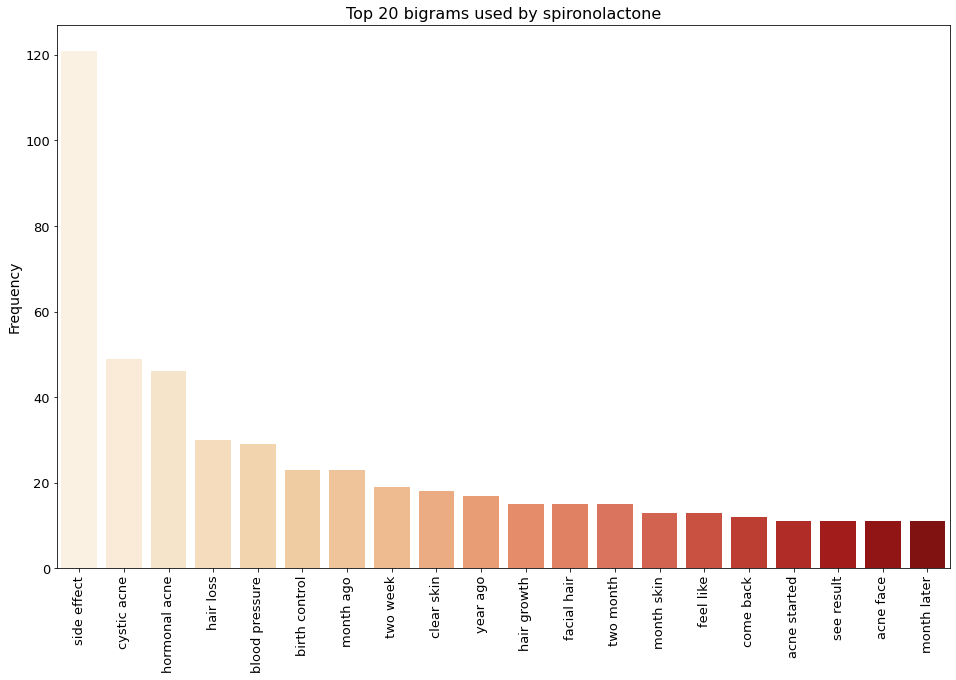

In [107]:
plot(get_top_n_bigram,'Spironolactone','spironolactone','bigrams','OrRd') ##Top 20 bigrams for Spironolactone

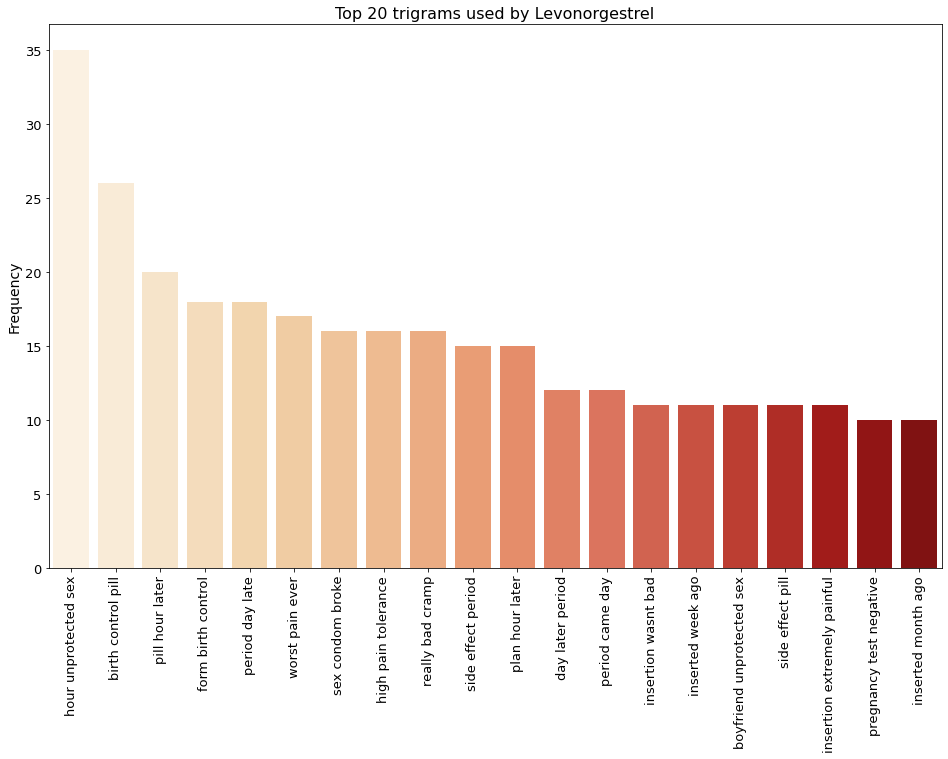

In [108]:
plot(get_top_n_trigram,'Levonorgestrel','Levonorgestrel','trigrams','OrRd')

C:\Users\YASHESWI MISHRA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\YASHESWI MISHRA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\YASHESWI MISHRA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\YASHESWI MISHRA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\YASHESWI MISHRA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\YASHESWI MISHRA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\YASHESWI MISHRA\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

